# Decision Trees
Within this challenge, we're going to use decision trees in both a classification sense and a regression sense and visualize each of these representations. In this challenge, we will be using the `mpg` dataset.

## Regression Trees

In [ ]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")

# Drop the rows with missing values
# Drop the "name" column
# Transform the "origin" column to represent the following:
#   USA = 0, Japan = 1, Europe = 2

# INSERT CODE HERE

data2 = data.dropna()
data2.drop('name', axis=1, inplace=True)
data2['origin'] = data2['origin'].factorize()[0]
print (data["origin"].value_counts())
print (data2["origin"].value_counts())
data2.head()

usa       249
japan      79
europe     70
Name: origin, dtype: int64
0    245
1     79
2     68
Name: origin, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0


In [ ]:
# Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%
# INSERT CODE HERE

X = data2[["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]]
y = data2["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)


In [ ]:
# Fit a decision tree
# INSERT CODE HERE


from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Predict on the xtest set
# INSERT CODE HERE

modelDTR.predict(X_test)

array([25. , 19. , 37.2, 33. , 27. , 27. , 12. , 31.5, 18. , 31. , 15. ,
       16.5, 17.5, 28. , 16.5, 27. , 18. , 32.4, 36.4, 37. , 20.3, 36. ,
       35.1, 17. , 31. , 28. , 18. , 18. , 26. , 25. , 16. , 20.2, 23. ,
       28. , 14. , 31. ,  9. , 25. , 14. , 12. , 14. , 28. , 34. , 26. ,
       16. , 11. , 18. , 46.6, 25. , 33. , 14. , 21. , 21. , 37. , 38. ,
       16. , 22. , 19. , 24. , 23. , 11. , 20. , 28.8, 23.8, 24. , 26. ,
       24.5, 33. , 23. , 14. , 25. , 13. , 20.3, 19. , 20.5, 24. , 13. ,
       17. , 24. ])

In [ ]:
# Print out the R2 score.
# INSERT CODE HERE

print("\nScore for the Train dataset :", modelDTR.score(X_train, y_train))
print("Score for the Test dataset :", modelDTR.score(X_test, y_test))


Score for the Train dataset : 1.0
Score for the Test dataset : 0.7532591387294727


In [ ]:
# Print each feature with importance %
# INSERT CODE HERE
modelDTR.feature_importances_

array([0.00614516, 0.62797024, 0.1733152 , 0.06231011, 0.02162947,
       0.1047651 , 0.00386472])

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


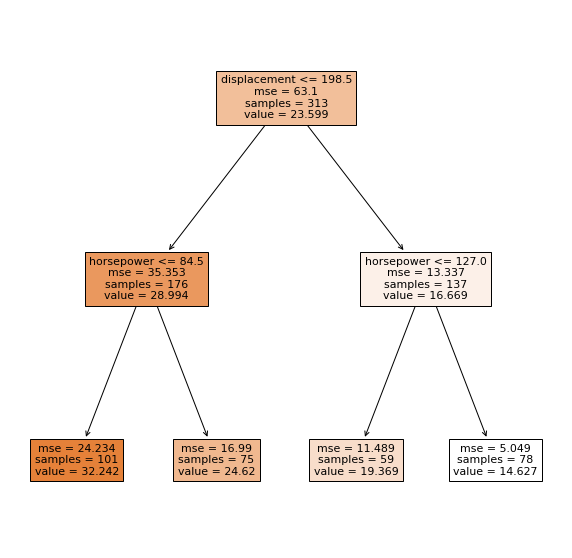

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE

modelDTR = DecisionTreeRegressor(max_depth = 2)
modelDTR.fit(X_train, y_train)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plot_tree(modelDTR, filled = True,  
          class_names = modelDTR.classes_, 
          feature_names=X_train.columns )
plt.show()

## Classification Trees

In [ ]:
# Load in the Penguins dataset
data = sns.load_dataset('penguins')

# Drop rows with missing values
# Turn the species column into numeric
# Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2

# Turn the island column into numeric
# Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# INSERT CODE HERE


data2 = data.dropna()
data2['species'] = data2['species'].factorize()[0]
data2['island'] = data2['island'].factorize()[0]
data2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,Male
1,0,0,39.5,17.4,186.0,3800.0,Female
2,0,0,40.3,18.0,195.0,3250.0,Female
4,0,0,36.7,19.3,193.0,3450.0,Female
5,0,0,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,2,1,47.2,13.7,214.0,4925.0,Female
340,2,1,46.8,14.3,215.0,4850.0,Female
341,2,1,50.4,15.7,222.0,5750.0,Male
342,2,1,45.2,14.8,212.0,5200.0,Female


In [ ]:
# Using a random state of 42 and a test size of 0.20, as well as "sex" as the output, split in training and testing sets
# INSERT CODE HERE

X = data2[["species", "island", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = data2["sex"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [ ]:
# Using a random state of 42, fit the classification tree.
# INSERT CODE HERE

from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Print the predictions on the test set
# INSERT CODE HERE

modelDTC.predict(X_test)

array(['Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female'], dtype=object)

In [ ]:
# Print the accuracy score for the predictions
# INSERT CODE HERE
print("accuracy score on train set:",modelDTC.score(X_train, y_train))
print("accuracy score on test set:",modelDTC.score(X_test, y_test))

accuracy score on train set: 1.0
accuracy score on test set: 0.835820895522388


In [ ]:
# Print each feature with importance %
# INSERT CODE HERE

modelDTC.feature_importances_

array([0.        , 0.01003925, 0.06177237, 0.50042099, 0.02979506,
       0.39797233])

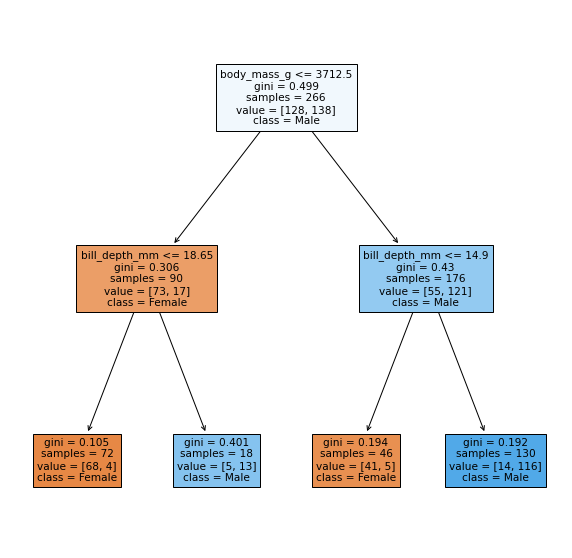

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE

modelDTC = DecisionTreeClassifier(max_depth = 2)
modelDTC.fit(X_train, y_train)

plt.figure(figsize = (10,10))
plot_tree(modelDTC, filled = True,  
          class_names = modelDTC.classes_, 
          feature_names=X_train.columns )
plt.show()

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!*** Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).


Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.

In [ ]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies = []
for i in range(1, 11):
  modelDTC = DecisionTreeClassifier(max_depth = i)
  modelDTC.fit(X_train, y_train)
  list_of_accuracies.append(modelDTC.score(X_train, y_train))

list_of_accuracies

[0.7293233082706767,
 0.8947368421052632,
 0.9285714285714286,
 0.9360902255639098,
 0.9586466165413534,
 0.9736842105263158,
 0.9887218045112782,
 0.9924812030075187,
 0.9962406015037594,
 0.9962406015037594]

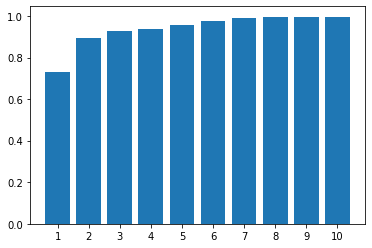

In [ ]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE

X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]



plt.bar(X, list_of_accuracies)
plt.xticks(ticks = range(1,11))
plt.show()